Reference

https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/#:~:text=Face%20detection%20is%20a%20computer,such%20as%20the%20cascade%20classifier.

# Face Detectiokn with OpenCV

In [1]:
from cv2 import imread, imshow, waitKey, destroyAllWindows, CascadeClassifier, rectangle

pixels = imread('test2.jpg')
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
bboxes = classifier.detectMultiScale(pixels, 1.1, 10)

for box in bboxes:
    x, y, width, height = box
    x2, y2 = x + width, y + height
    rectangle(pixels, (x,y), (x2, y2), (0, 0, 255), 1)

imshow('face detection', pixels)

waitKey(0)
destroyAllWindows()


error: OpenCV(4.5.1) /tmp/pip-req-build-jhawztrk/opencv/modules/highgui/src/window.cpp:651: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


# Face Detection with DL

In [1]:
import mtcnn
print(mtcnn.__version__)

0.1.0


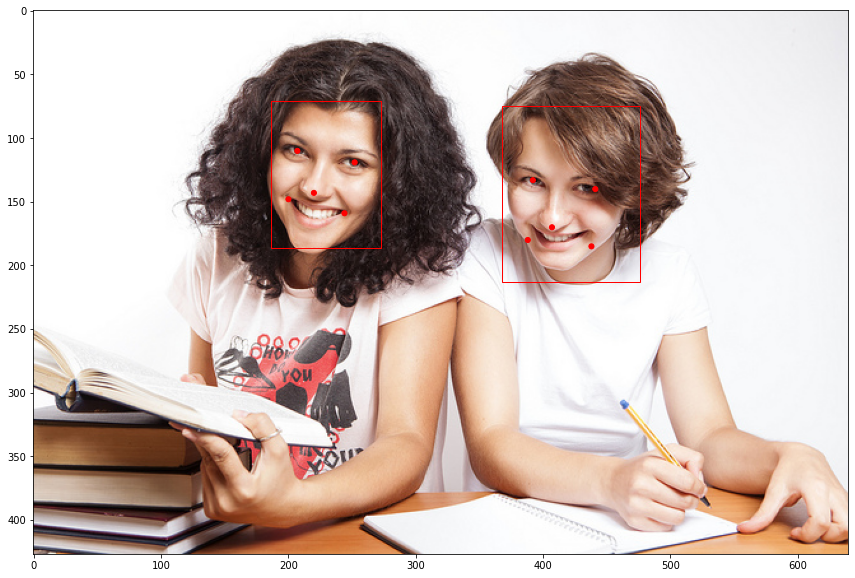

In [20]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle, Circle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    pyplot.figure(figsize=(20,10))

    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
        
    # show the plot
    pyplot.show()

filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

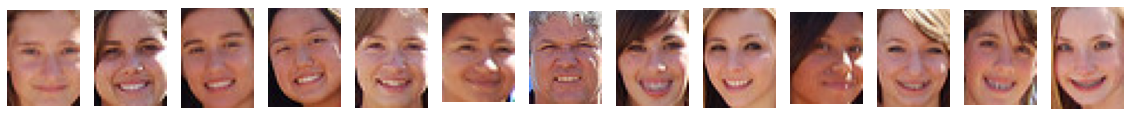

In [23]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle, Circle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    pyplot.figure(figsize=(20,10))

    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
        
    # show the plot
    pyplot.show()

def draw_faces(filename, result_list):
    plt.figure(figsize=(20,20))
    data = plt.imread(filename)
    
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        
        plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        plt.imshow(data[y1:y2, x1:x2])
    plt.show()

filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

In [104]:
import cv2

cv2.namedWindow("preview")
cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output1.avi', fourcc, 20.0, (640,480))

while (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        out.write(frame)
        cv2.imshow("preview", cv2.flip(frame, 1))
        rval, frame = vc.read()
        key = cv2.waitKey(20)
        if key == 27:  # exit on ESC
            break
    else:
        break
        
cv2.destroyWindow("preview")
cap.release()

Webcam with CV face detection

In [3]:
from cv2 import imread, imshow, waitKey, destroyAllWindows, CascadeClassifier, rectangle

import cv2

cv2.namedWindow("preview")
cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_facedetection_OpenCV.avi', fourcc, 20.0, (640,480))

classifier = CascadeClassifier('haarcascade_frontalface_default.xml')

while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.flip(frame, 1)
        cropped = frame[206-100:206+100,256-100:256+100]

        bboxes = classifier.detectMultiScale(cropped, 1.5, 5)

        for box in bboxes:
            x, y, width, height = box
            x, y = x+256-100, y+206-100

            x2, y2 = x + width, y + height        

            rectangle(frame, (x,y), (x2, y2), (0, 100, 100), 5)

        cv2.ellipse(frame, (256,206), (100,100),0,0,360,50,5)
        cv2.rectangle(frame, (256-100,206-100), (256+100,206+100), (0,0,255), 10)
        cv2.imshow("preview", frame)
        out.write(frame)
        key = cv2.waitKey(20)

        if key == 27:  # exit on ESC
            break
    else:
        break
        
cv2.destroyWindow("preview")
cap.release()


Webcam with DL face detection

In [4]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle, Circle
from mtcnn.mtcnn import MTCNN

from cv2 import imread, imshow, waitKey, destroyAllWindows, CascadeClassifier, rectangle

import cv2

cv2.namedWindow("preview")
cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_facedetection_DL.avi', fourcc, 20.0, (640,480))

# create the detector, using default weights
detector = MTCNN()

while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.flip(frame, 1)

        # detect faces in the image
        faces = detector.detect_faces(frame)

        # display faces on the original image
        for face in faces[:1]:
            x, y, width, height = face['box']
            x2, y2 = x + width, y + height
            rectangle(frame, (x,y), (x2, y2), (0, 0, 255), 1)

        cv2.imshow("preview", frame)
        out.write(frame)
        key = cv2.waitKey(20)

        if key == 27:  # exit on ESC
            break
    else:
        break
        
cv2.destroyWindow("preview")
cap.release()


In [1]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

# IR camera
http://petermortimer.de/dell-xps-ir-camera.html